In [1]:
!pip install opendatasets


In [2]:
import opendatasets as od

In [3]:
dataset = 'https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset'

In [4]:
od.download(dataset)

Skipping, found downloaded files in ".\a-large-scale-fish-dataset" (use force=True to force download)


In [5]:
import os

In [6]:
import numpy as np
import pandas as pd
import os

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [9]:
from tensorflow.keras.applications import MobileNetV2

In [10]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
DIR = './a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset' #Creating a master directory
classes = [i for i in os.listdir(DIR) if '.' not in i]                     #Creating classes out of the required folders
classes

['Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [14]:
label = []
path = []

for dirname, _,filenames in os.walk(DIR):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.png':               
            if dirname.split()[-1]!='GT':                       
                label.append(os.path.split(dirname)[-1])          
                path.append(os.path.join(dirname,filename))     
                
df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label                


In [15]:
df.head()

path            label
0  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...  Black Sea Sprat
1  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...  Black Sea Sprat
2  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...  Black Sea Sprat
3  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...  Black Sea Sprat
4  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...  Black Sea Sprat

In [16]:
df.path[0]

'./a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset\\Black Sea Sprat\\Black Sea Sprat\\00001.png'

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [18]:
df['label'].value_counts()

label
Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: count, dtype: int64

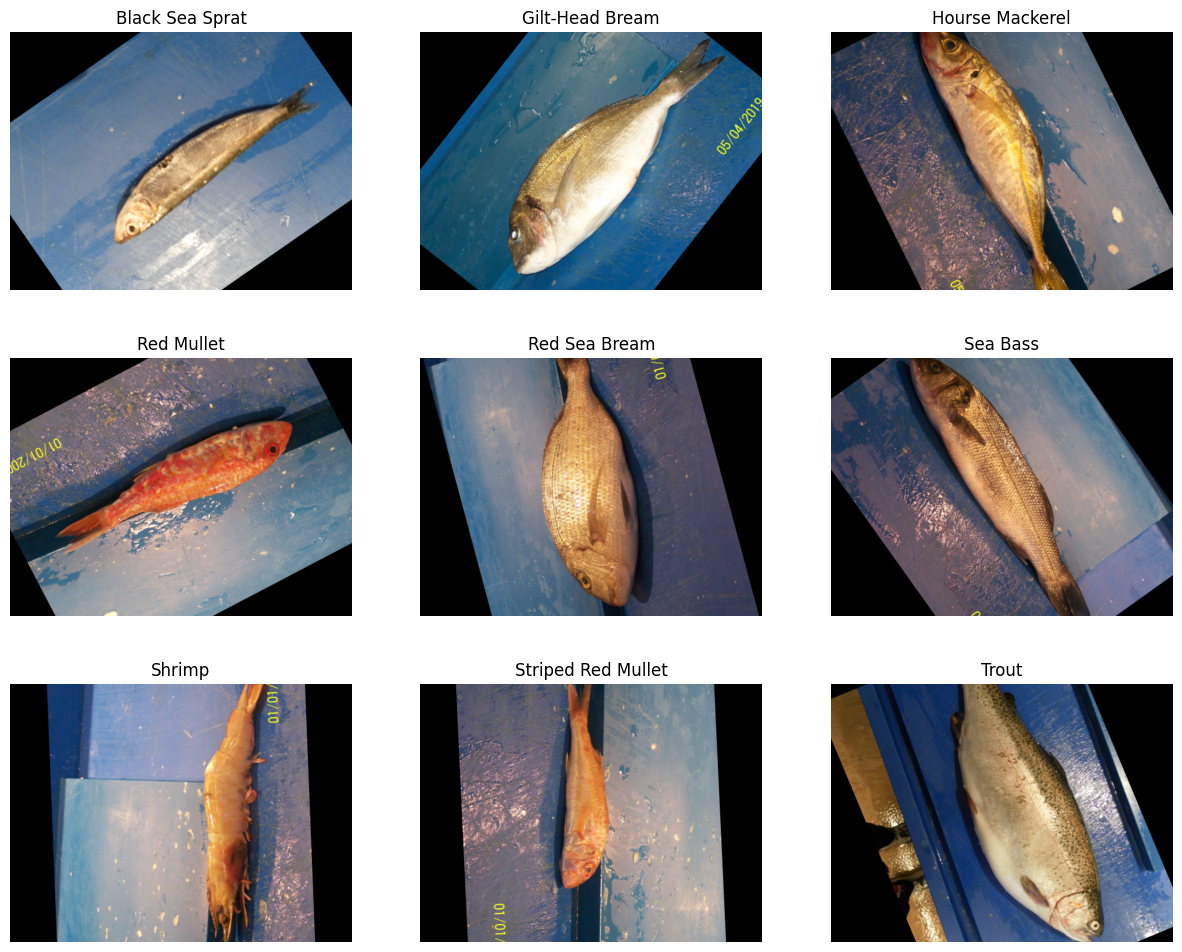

In [19]:
idx = 0
plt.figure(figsize=(15,12))
for unique_label in df['label'].unique():
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

In [20]:
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

In [21]:
print(train_df.shape)
print(test_df.shape)

(7200, 2)
(1800, 2)


In [22]:
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [23]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [24]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


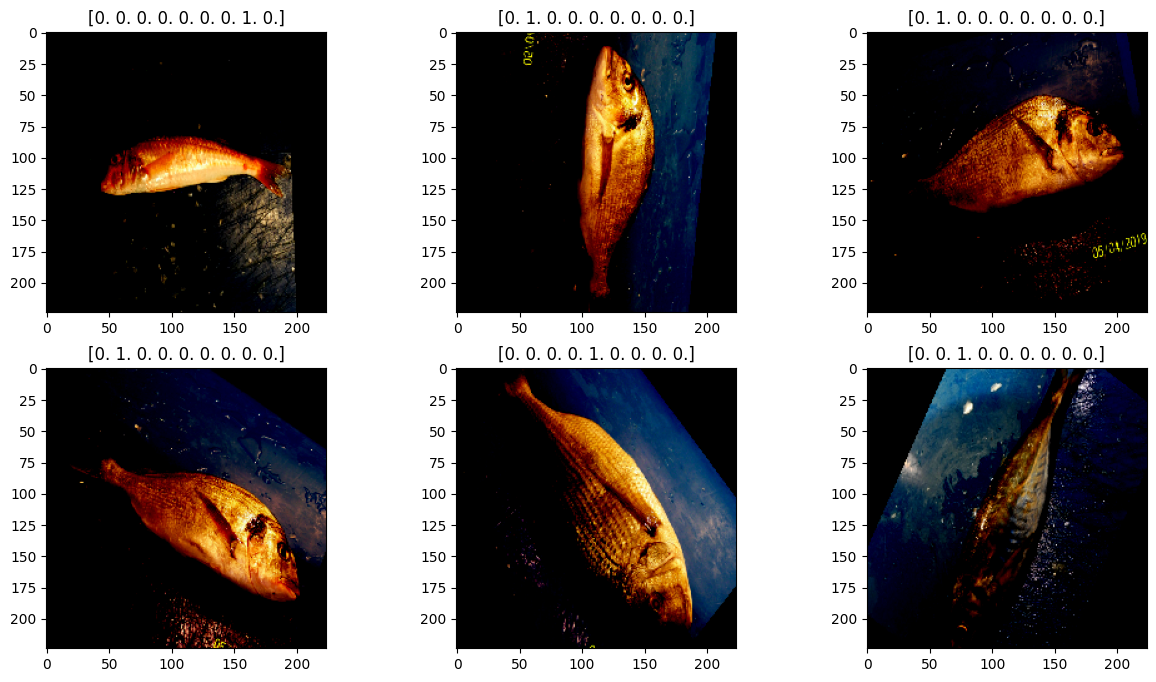

In [25]:
fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for _ in range(6):
    img, label = test_images.next()
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    j=j+1

In [26]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [27]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(9, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_images,
                    validation_data=val_images,
                    epochs=5)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [28]:
results = model.evaluate(test_images, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.00374
Test Accuracy: 99.83%


In [29]:
pred = model.predict(test_images)
pred=np.argmax(pred,axis=1)

57/57 [==============================] - 34s 572ms/step


In [30]:
pred_df=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

In [31]:
pred_df=pred_df.reset_index(drop=True)
pred_df.head(10)

path               label   
0  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...  Striped Red Mullet  \
1  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...     Gilt-Head Bream   
2  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...     Black Sea Sprat   
3  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...       Red Sea Bream   
4  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...               Trout   
5  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...               Trout   
6  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...            Sea Bass   
7  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...               Trout   
8  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...          Red Mullet   
9  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...       Red Sea Bream   

                 pred  
0  Striped Red Mullet  
1     Gilt-Head Bream  
2     Black Sea Sprat  
3       Red Sea Bream  
4               Trout  
5               Trout  
6            Sea Bass  
7               Trout  
8          Red Mullet  
9       Red Sea Bream

In [32]:
pred_df[pred_df['label']!=pred_df['pred']]

path            label   
341   ./a-large-scale-fish-dataset/Fish_Dataset/Fish...       Red Mullet  \
1380  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...         Sea Bass   
1395  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...  Hourse Mackerel   

                    pred  
341   Striped Red Mullet  
1380       Red Sea Bream  
1395     Black Sea Sprat

In [33]:
pred_df.path[341]

'./a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset\\Red Mullet\\Red Mullet\\00127.png'

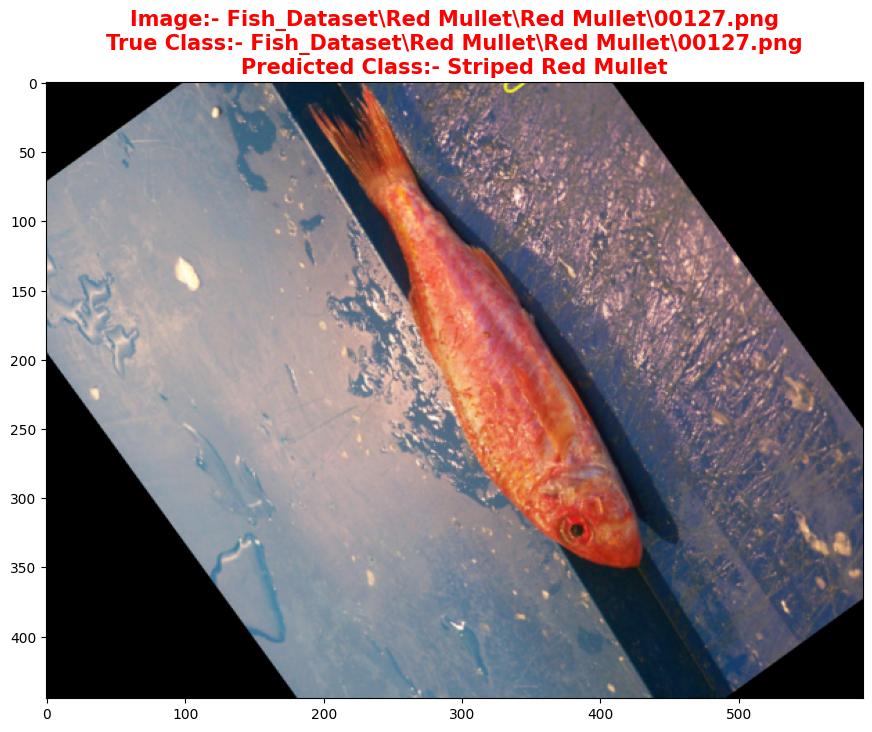

In [34]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread(pred_df.path[341]))
title1 = pred_df.path[341].split('/')[-1]
title2 = pred_df.path[341].split('/')[-1]
title3 = pred_df.pred[341]
plt.title(f'Image:- {title2}\nTrue Class:- {title1}\nPredicted Class:- {title3}', color = 'r', weight = 'bold', fontsize = 15)
plt.show()

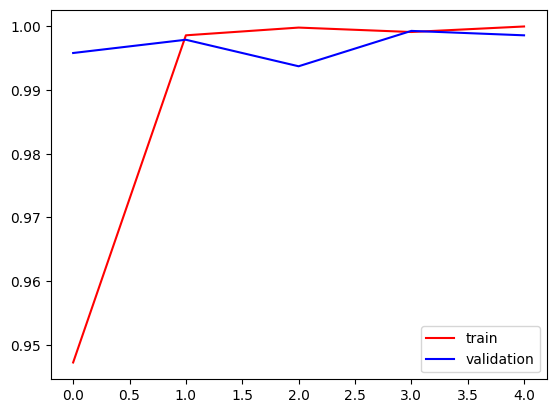

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

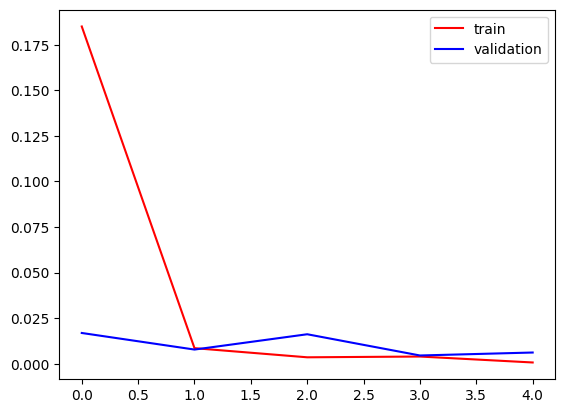

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [37]:
pred_df[pred_df['label']==pred_df['pred']]

path               label   
0     ./a-large-scale-fish-dataset/Fish_Dataset/Fish...  Striped Red Mullet  \
1     ./a-large-scale-fish-dataset/Fish_Dataset/Fish...     Gilt-Head Bream   
2     ./a-large-scale-fish-dataset/Fish_Dataset/Fish...     Black Sea Sprat   
3     ./a-large-scale-fish-dataset/Fish_Dataset/Fish...       Red Sea Bream   
4     ./a-large-scale-fish-dataset/Fish_Dataset/Fish...               Trout   
...                                                 ...                 ...   
1795  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...          Red Mullet   
1796  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...              Shrimp   
1797  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...              Shrimp   
1798  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...          Red Mullet   
1799  ./a-large-scale-fish-dataset/Fish_Dataset/Fish...     Gilt-Head Bream   

                    pred  
0     Striped Red Mullet  
1        Gilt-Head Bream  
2        Black Sea Sprat  
3          Red Sea Bream  
4                  Trout  
...                  ...  
1795          Red Mullet  
1796              Shrimp  
1797              Shrimp  
1798          Red Mullet  
1799     Gilt-Head Bream  

[1797 rows x 3 columns]

In [38]:
pred_df.path[4]

'./a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset\\Trout\\Trout\\00413.png'

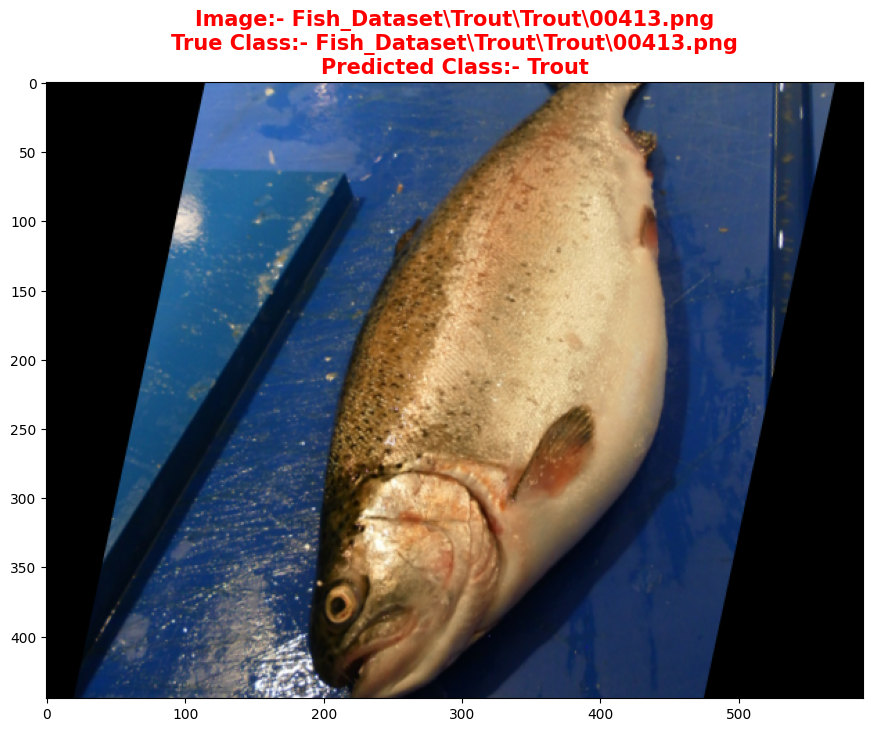

In [39]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread(pred_df.path[4]))
title1 = pred_df.path[4].split('/')[-1]
title2 = pred_df.path[4].split('/')[-1]
title3 = pred_df.pred[4]
plt.title(f'Image:- {title2}\nTrue Class:- {title1}\nPredicted Class:- {title3}', color = 'r', weight = 'bold', fontsize = 15)
plt.show()

In [40]:
import pickle

In [41]:
with open('model_pickle','wb') as file:
    pickle.dump(model,file)
   

INFO:tensorflow:Assets written to: ram://17b54d4e-0f1d-40a1-a757-95f47b68f9e5/assets


INFO:tensorflow:Assets written to: ram://17b54d4e-0f1d-40a1-a757-95f47b68f9e5/assets


In [42]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://2b306538-6efd-40f7-b52b-8f711b049d42/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [44]:
import joblib

In [45]:
joblib.dump(model,"model_joblib.pkl")

INFO:tensorflow:Assets written to: ram://810fd0e9-fb52-4c6a-a773-45aed6b04b88/assets


INFO:tensorflow:Assets written to: ram://810fd0e9-fb52-4c6a-a773-45aed6b04b88/assets


['model_joblib.pkl']

In [46]:
classifier = joblib.load('model_joblib.pkl')

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://ebf18b39-dc3c-443b-9888-e33e0ffd18d9/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [49]:
keras_file="Model.h5"
tf.keras.models.save_model(model,keras_file)

In [55]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
#load saved model
model = load_model("Model.h5") 
img_path = "shrimp.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
class_labels = ['Black Sea Sprat','Gilt-Head Bream','Hourse Mackerel','Red Mullet','Red Sea Bream','Sea Bass','Shrimp','Striped Red Mullet','Trout']
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
print(class_labels[pred[0]])

1/1 [==============================] - 1s 912ms/step
Shrimp


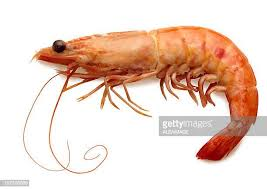

In [56]:
from IPython.display import Image
display(Image(filename="shrimp.jpg"))

In [57]:
model_version=2
model.save(f"../models/{model_version}")


INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
